<a href="https://colab.research.google.com/github/noman-abdullah2000/Machine-learning-projects/blob/main/Diabetic_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [77]:
df=pd.read_csv("/content/drive/MyDrive/dataset/diabetes.csv")
df

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,tested_negative
764,2,122,70,27,0,36.8,0.340,27,tested_negative
765,5,121,72,23,112,26.2,0.245,30,tested_negative
766,1,126,60,0,0,30.1,0.349,47,tested_positive


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   insu    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


In [108]:
df.shape

(768, 9)

In [79]:
df.describe()

,preg,plas,pres,skin,insu,mass,pedi,age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [80]:
df.isnull().sum()

preg     0
plas     0
pres     0
skin     0
insu     0
mass     0
pedi     0
age      0
class    0
dtype: int64

In [81]:
df.dtypes

preg       int64
plas       int64
pres       int64
skin       int64
insu       int64
mass     float64
pedi     float64
age        int64
class     object
dtype: object

#Visualization

> Bar chart



<BarContainer object of 2 artists>

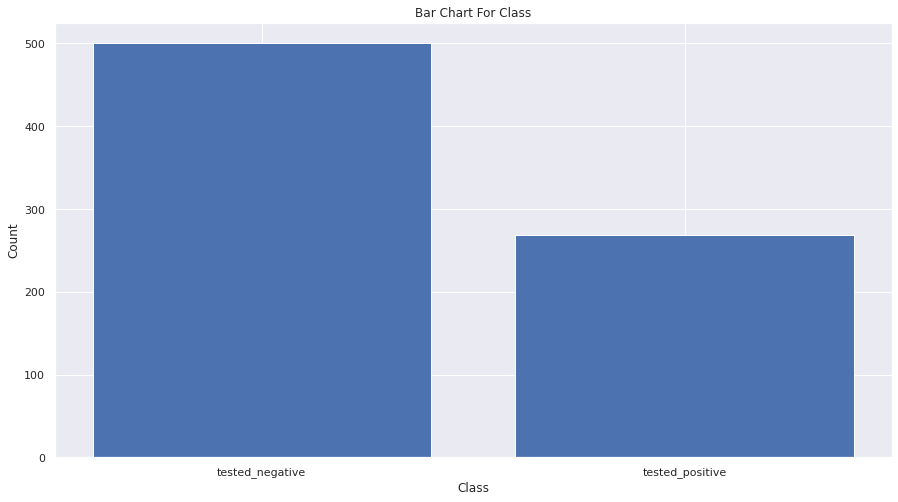

In [82]:
data=df["class"].value_counts()
name=data.index
count=data.values
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Bar Chart For Class")
plt.bar(name,count)



> CountPlot



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


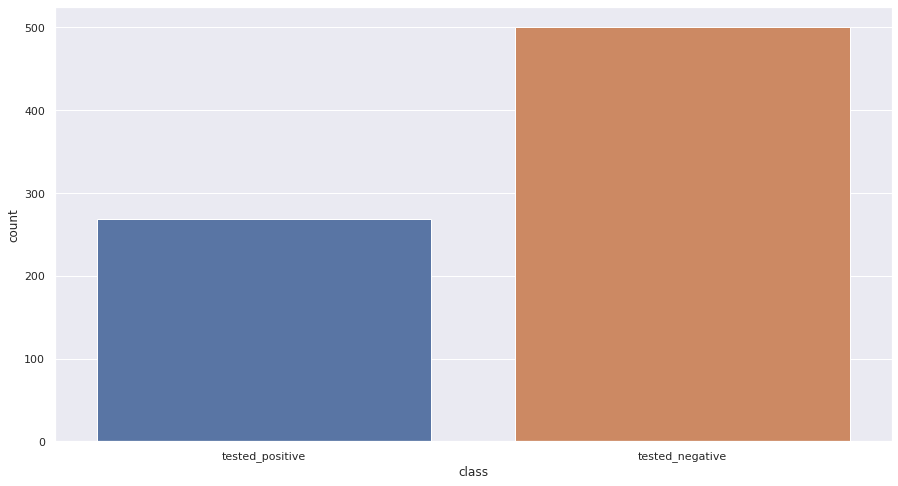

In [83]:
sns.countplot(df["class"])

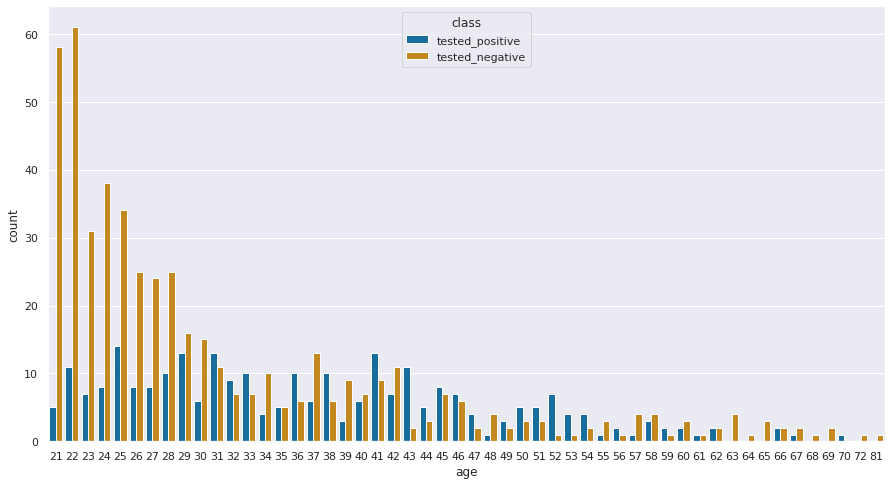

In [84]:
sns.countplot(x='age',hue='class',data=df,palette="colorblind")
sns.set(rc={'figure.figsize':(15,8)})

Scatter Plot

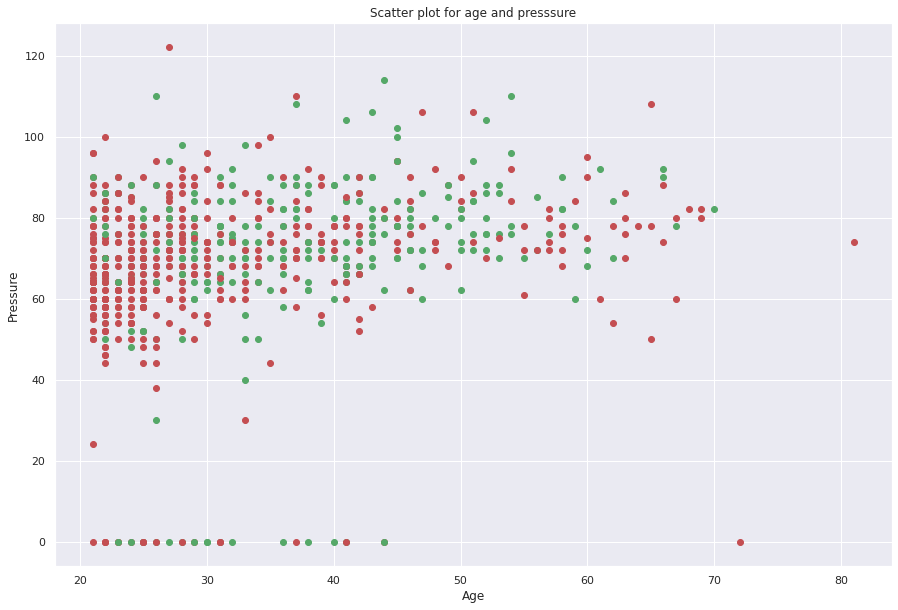

In [85]:
col={"tested_positive":"g","tested_negative":"r"}
fig,ax=plt.subplots()

for i in range(len(df["age"])):
  ax.scatter(df["age"][i],df["pres"][i],color=col[df["class"][i]])
plt.title("Scatter plot for age and presssure")
plt.xlabel("Age")
plt.ylabel("Pressure")
fig.set_size_inches(15,10)

Drop Outcome

In [86]:
x=df.drop("class",axis=1)
y=df["class"]

Scalling

Divided into train and test data

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.2)

In [89]:
x_train

,preg,plas,pres,skin,insu,mass,pedi,age
268,0,102,52,0,0,25.1,0.078,21
618,9,112,82,24,0,28.2,1.282,50
669,9,154,78,30,100,30.9,0.164,45
714,3,102,74,0,0,29.5,0.121,32
139,5,105,72,29,325,36.9,0.159,28
...,...,...,...,...,...,...,...,...
580,0,151,90,46,0,42.1,0.371,21
201,1,138,82,0,0,40.1,0.236,28
445,0,180,78,63,14,59.4,2.420,25
639,1,100,74,12,46,19.5,0.149,28


In [90]:
x_test

,preg,plas,pres,skin,insu,mass,pedi,age
217,6,125,68,30,120,30.0,0.464,32
349,5,0,80,32,0,41.0,0.346,37
648,11,136,84,35,130,28.3,0.260,42
254,12,92,62,7,258,27.6,0.926,44
12,10,139,80,0,0,27.1,1.441,57
...,...,...,...,...,...,...,...,...
373,2,105,58,40,94,34.9,0.225,25
733,2,106,56,27,165,29.0,0.426,22
42,7,106,92,18,0,22.7,0.235,48
22,7,196,90,0,0,39.8,0.451,41


In [91]:
y_train

268    tested_negative
618    tested_positive
669    tested_negative
714    tested_negative
139    tested_negative
            ...       
580    tested_positive
201    tested_negative
445    tested_positive
639    tested_negative
654    tested_negative
Name: class, Length: 614, dtype: object

In [92]:
y_test

217    tested_negative
349    tested_positive
648    tested_positive
254    tested_positive
12     tested_negative
            ...       
373    tested_negative
733    tested_negative
42     tested_negative
22     tested_positive
593    tested_negative
Name: class, Length: 154, dtype: object

Encoding for Y train

In [93]:
from sklearn.preprocessing import LabelEncoder

In [94]:
lb=LabelEncoder()

ytrain=lb.fit_transform(y_train)
ytest=lb.transform(y_test)

In [95]:
ytest

array([0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0])

KNeighbors Classifier

In [96]:
from sklearn.neighbors import KNeighborsClassifier

In [97]:
knnc=KNeighborsClassifier()

knnc.fit(x_train,ytrain)

KNeighborsClassifier()

In [98]:
knnc.score(x_train,ytrain)

0.7866449511400652

In [99]:
knnc.score(x_test,ytest)

0.7402597402597403

In [100]:
knnc.predict(x_test)

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0])

In [101]:
predict= knnc.predict([[8	,200	,80	,0,	0,23.5,0.150,60]])

if (predict==1):
  print("You are a Diabetic Patient")
else:
  print("You have no Diabetis")  

You are a Diabetic Patient


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


Random Forest Classifier

In [102]:
from sklearn.ensemble import RandomForestClassifier

In [103]:
rfc=RandomForestClassifier()
rfc.fit(x_train,ytrain)

RandomForestClassifier()

In [104]:
rfc.score(x_train,ytrain)

1.0

In [105]:
rfc.score(x_test,ytest)

0.7207792207792207

In [107]:
rp=rfc.predict([[6,194,78,0,0,23.5,0.129,59]])
if(rp==1):
  print("Diabetis")
else:
  print("No diabetis")  



Diabetis


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
